In [144]:
!pip3 install numpy pandas matplotlib sklearn tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

    100% |████████████████████████████████| 109.3MB 12kB/s  eta 0:00:01   36% |███████████▋                    | 39.6MB 46.2MB/s eta 0:00:02
    100% |████████████████████████████████| 1.3MB 813kB/s eta 0:00:01
    100% |████████████████████████████████| 3.2MB 450kB/s eta 0:00:01
    100% |████████████████████████████████| 19.6MB 76kB/s  eta 0:00:01
    100% |████████████████████████████████| 61kB 10.7MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 5.3MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 11.1MB/s ta 0:00:01
    100% |████████████████████████████████| 491kB 2.9MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 11.8MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 12.1MB/s ta 0:00:01
    100% |████████████████████████████████| 307kB 4.1MB/s eta 0:00:01
    100% |████████████████████████████████| 2.9MB 532kB/s eta 0:00:01
  Running setup.py bdist_wheel for wrapt ... done
  Stored in directory: /home/opam/.cache/p

/home/opam/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/opam/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/opam/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/opam/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [101]:
data_path = r'data.csv'
df = pd.read_csv(data_path)

In [102]:
def rate_of_change(column, steps, bl):
    
    column_temp = np.array(column.copy())
    column = np.array(column)
    for i in range (steps):
        column_temp = np.delete(column_temp, 0)
        column_temp = np.append(column_temp, 0)
        
    if bl:
        return pd.Series(column - column_temp).astype(int)
    else:
        return pd.Series(column - column_temp)


def remove_step(column, steps):

    for i in range (steps):
        column = np.delete(column, -1)
        
    return column


def remove_last_row(size, step):
    return [i for i in range(size-1,size-step-1,-1)]

In [197]:
step = 1

df1 = df

y = rate_of_change(df1['index'],step,1)
x = df1.drop(columns = [df1.columns[0], 'index'])

for column in x.columns:
    x[column] = rate_of_change(df[column],step,0)
    
y = y.drop(remove_last_row(y.size,step))
x = x.drop(remove_last_row(y.size,step))

y = y.reset_index(drop=True)
x = x.reset_index(drop=True)

In [128]:
x1 = [i for i in range(y.size)]

cv_size = 10

split = np.array_split(x1, cv_size)

def predictions(x,y,model,size = cv_size, split = split):
    
    predicted = []

    for i in range(cv_size):
        xc = x.copy()
        yc = y.copy()
        cv_split = split[i].tolist()
        y_test = yc.iloc[cv_split]
        x_test = xc.iloc[cv_split]
        y_train = yc.drop(cv_split)
        x_train = xc.drop(cv_split)
        model.fit(x_train,y_train)
        predicted += model.predict(x_test).tolist()
        
    return np.array(predicted).cumsum()

In [110]:
# trying out different regressor/classification models
# I don't know if any of this is actually helpful

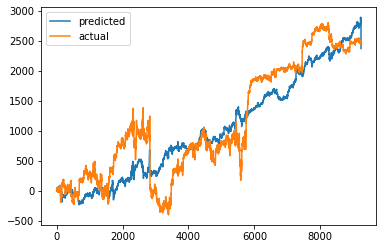

In [129]:
from sklearn.ensemble import RandomForestRegressor


RFG = predictions(x,y,RandomForestRegressor())


plt.plot(x1, RFG)
plt.plot(x1, y.copy().cumsum())

plt.legend(["predicted", "actual"])

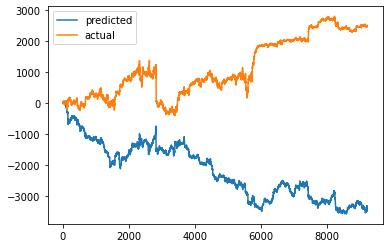

In [130]:
from sklearn.ensemble import RandomForestClassifier


RFC = predictions(x,y,RandomForestClassifier())


plt.plot(x1, RFC)
plt.plot(x1, y.copy().cumsum())

plt.legend(["predicted", "actual"])

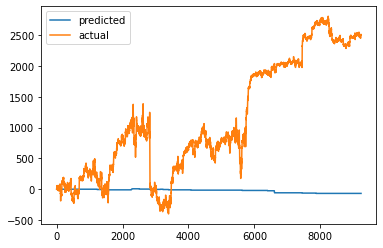

In [131]:
from sklearn.svm import SVC

svc = predictions(x,y, SVC(kernel = 'rbf'))

plt.plot(x1, svc)
plt.plot(x1, y.cumsum())

plt.legend(["predicted", "actual"])

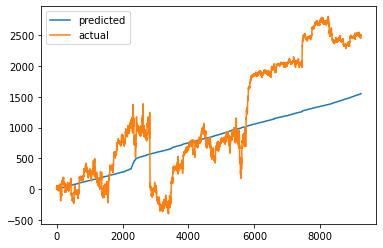

In [132]:
from sklearn.svm import SVR

svr = predictions(x,y, SVR(kernel = 'rbf'))

plt.plot(x1, svr)
plt.plot(x1, y.cumsum())

plt.legend(["predicted", "actual"])

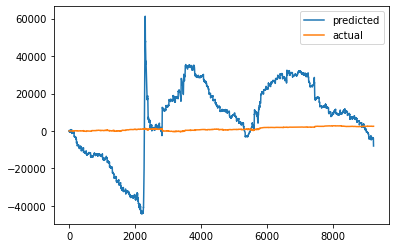

In [138]:
from sklearn.svm import SVR

svr = predictions(x,y, SVR(kernel = 'sigmoid'))

plt.plot(x1, svr)
plt.plot(x1, y.cumsum())

plt.legend(["predicted", "actual"])

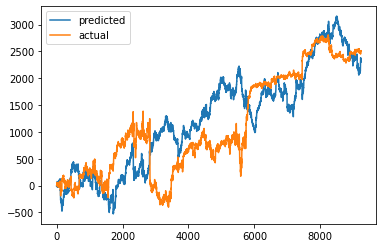

In [134]:
from sklearn.tree import DecisionTreeClassifier 

DTC = predictions(x,y, DecisionTreeClassifier(criterion = 'entropy'))

plt.plot(x1, DTC)
plt.plot(x1, y.cumsum())

plt.legend(["predicted", "actual"])

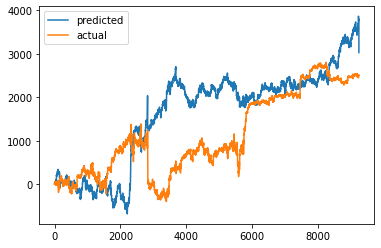

In [136]:
from sklearn.tree import DecisionTreeRegressor 

DTR = predictions(x,y, DecisionTreeRegressor())

plt.plot(x1, DTR)
plt.plot(x1, y.cumsum())

plt.legend(["predicted", "actual"])

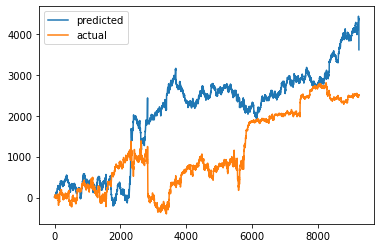

In [137]:
from sklearn.tree import DecisionTreeRegressor 

DTRf = predictions(x,y, DecisionTreeRegressor(criterion = 'friedman_mse'))

plt.plot(x1, DTRf)
plt.plot(x1, y.cumsum())

plt.legend(["predicted", "actual"])

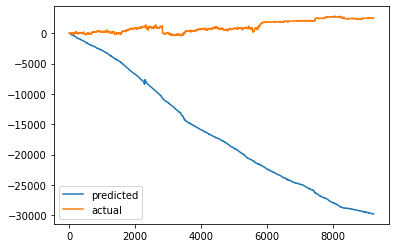

In [139]:
from sklearn.svm import SVC

svc1 = predictions(x,y, SVC(kernel = 'sigmoid'))

plt.plot(x1, svc1)
plt.plot(x1, y.cumsum())

plt.legend(["predicted", "actual"])

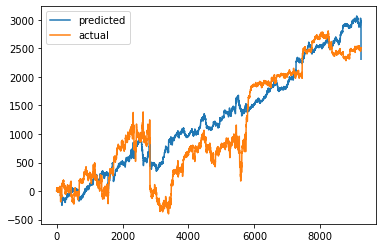

In [140]:
from sklearn.ensemble import ExtraTreesRegressor


ETR = predictions(x,y,ExtraTreesRegressor())


plt.plot(x1, ETR)
plt.plot(x1, y.copy().cumsum())

plt.legend(["predicted", "actual"])

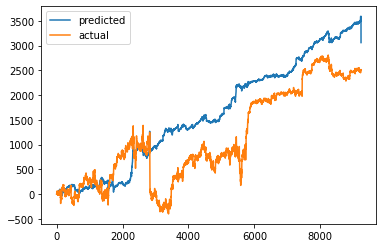

In [141]:
from sklearn.ensemble import GradientBoostingRegressor


GBR = predictions(x,y,GradientBoostingRegressor())


plt.plot(x1, GBR)
plt.plot(x1, y.copy().cumsum())

plt.legend(["predicted", "actual"])

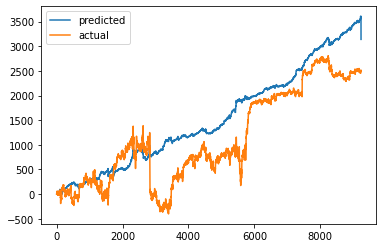

In [142]:
from sklearn.ensemble import GradientBoostingRegressor


GBR = predictions(x,y,GradientBoostingRegressor(loss = 'lad'))


plt.plot(x1, GBR)
plt.plot(x1, y.copy().cumsum())

plt.legend(["predicted", "actual"])

In [191]:
# ann classifier

def nn_predictions(x,y,model,size = cv_size, split = split):
    
    predicted = []

    for i in range(cv_size):
        xc = x.copy()
        yc = y.copy()
        cv_split = split[i].tolist()
        y_test = yc[cv_split[0]:cv_split[-1]+1]
        x_test = xc[cv_split[0]:cv_split[-1]+1]
        y_train = yc[:cv_split[0]] + yc[cv_split[-1]+1:]
        x_train = xc[:cv_split[0]] + xc[cv_split[-1]+1:]
        model.fit(np.array(x_train),np.array(y_train), batch_size = 32, epochs = 100)
        predicted += model.predict(np.array(x_test)).tolist()
        
    return np.array(predicted).cumsum()

In [203]:
y0 = rate_of_change(df1['index'],step,0)
y0 = y0.drop(remove_last_row(y0.size,step))
y0 = y0.reset_index(drop=True)

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

neural_net = nn_predictions(x.values.tolist(),y0.tolist(),ann)

Epoch 1/100
8314/8314 [==============================] - 1s 95us/sample - loss: 486.5141
Epoch 2/100
8314/8314 [==============================] - 0s 43us/sample - loss: 486.3445
Epoch 3/100
8314/8314 [==============================] - 0s 42us/sample - loss: 486.3143
Epoch 4/100
8314/8314 [==============================] - 0s 42us/sample - loss: 486.3059
Epoch 5/100
8314/8314 [==============================] - 0s 43us/sample - loss: 486.2498
Epoch 6/100
8314/8314 [==============================] - 0s 47us/sample - loss: 486.2521
Epoch 7/100
8314/8314 [==============================] - 0s 45us/sample - loss: 486.2217
Epoch 8/100
8314/8314 [==============================] - 0s 43us/sample - loss: 486.1815
Epoch 9/100
8314/8314 [==============================] - 0s 46us/sample - loss: 486.1825
Epoch 10/100
8314/8314 [==============================] - 0s 41us/sample - loss: 486.1830
Epoch 11/100
8314/8314 [==============================] - 0s 40us/sample - loss: 486.1359
Epoch 12/100
8314/8

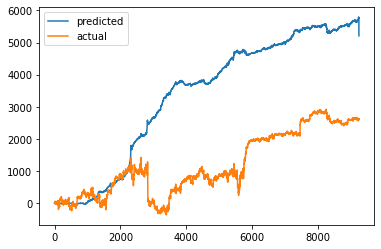

In [205]:
plt.plot(x1, neural_net)
plt.plot(x1, y0.copy().cumsum())

plt.legend(["predicted", "actual"])